In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/2_Loan_Prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/2_Loan_Prediction/test.csv")
ss = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/2_Loan_Prediction/sample_submission.csv")

train.shape , test.shape , ss.shape

((614, 13), (367, 12), (367, 2))

In [2]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
for col in train.iloc[:,0:13].columns:
    print(col,':',train[col].nunique(),':',train[col].isna().sum())

Loan_ID : 614 : 0
Gender : 2 : 13
Married : 2 : 3
Dependents : 4 : 15
Education : 2 : 0
Self_Employed : 2 : 32
ApplicantIncome : 505 : 0
CoapplicantIncome : 287 : 0
LoanAmount : 203 : 22
Loan_Amount_Term : 10 : 14
Credit_History : 2 : 50
Property_Area : 3 : 0
Loan_Status : 2 : 0


In [5]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
col_list = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]

for col in col_list:
    print(col,':',train[col].nunique(),':',train[col].isna().sum(),":",train[col].unique())

Gender : 2 : 13 : ['Male' 'Female' nan]
Married : 2 : 3 : ['No' 'Yes' nan]
Dependents : 4 : 15 : ['0' '1' '2' '3+' nan]
Education : 2 : 0 : ['Graduate' 'Not Graduate']
Self_Employed : 2 : 32 : ['No' 'Yes' nan]
Credit_History : 2 : 50 : [ 1.  0. nan]
Property_Area : 3 : 0 : ['Urban' 'Rural' 'Semiurban']


In [7]:
train['Dependents'].replace('3+', '3', inplace=True)
test['Dependents'].replace('3+', '3', inplace=True)


In [8]:
categorical_features = train.columns[train.dtypes=="object"].tolist()
numeric_features = train.columns[train.dtypes!="object"].tolist()

In [9]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
numeric_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])


In [12]:
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])


In [13]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])


In [14]:
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])


In [15]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [16]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])


In [17]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])


In [18]:
for col in train.iloc[:,0:13].columns:
    print(col,':',train[col].nunique(),':',train[col].isna().sum())

Loan_ID : 614 : 0
Gender : 2 : 0
Married : 2 : 0
Dependents : 4 : 0
Education : 2 : 0
Self_Employed : 2 : 0
ApplicantIncome : 505 : 0
CoapplicantIncome : 287 : 0
LoanAmount : 204 : 0
Loan_Amount_Term : 11 : 0
Credit_History : 2 : 0
Property_Area : 3 : 0
Loan_Status : 2 : 0


In [19]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
enc = LabelEncoder()

categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed","Credit_History","Property_Area"]

for cat_feat in categorical_features:
    train[cat_feat] = enc.fit_transform(train[cat_feat])
    test[cat_feat] = enc.transform(test[cat_feat])

In [23]:
categorical_features = train.columns[train.dtypes=="object"].tolist()
numeric_features = train.columns[train.dtypes!="object"].tolist()

In [24]:
categorical_features

['Loan_ID', 'Loan_Status']

In [25]:
numeric_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory usage: 62.5+ KB


In [28]:
train = train.drop(["Loan_ID"],axis=1)

In [29]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y


In [30]:
train.shape

(614, 12)

In [31]:
numeric_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [32]:
test = test[numeric_features]
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,1,0,0,1,0,3276,0,78.0,360.0,1,2


In [33]:
train["Loan_Status"] = enc.fit_transform(train["Loan_Status"] )

In [34]:


X = train.drop("Loan_Status", axis=1)
y = train["Loan_Status"]
X_test = test

In [35]:
# scaler = StandardScaler()

# scaled_numerical_data_train = scaler.fit_transform(X)
# scaled_numerical_data_test  = scaler.transform(test)

In [36]:
# scaled_numerical_data_train[0]

In [37]:
# features = numeric_features

# for i, feat in enumerate(features):
#     l = []

#     for j in range(len(scaled_numerical_data_train)):
#         l.append(scaled_numerical_data_train[j][i])

#     train[feat] = l

#     l = []

#     for j in range(len(scaled_numerical_data_test)):
#         l.append(scaled_numerical_data_test[j][i])

#     test[feat]  = l

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=82)

In [39]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [41]:
pip install catboost

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [43]:
cat = CatBoostClassifier(verbose=0, random_state=82)
parameters = {'iterations': [200],
              'learning_rate': [0.1],
              'depth': [5]}

clf = GridSearchCV(cat, parameters, cv=100)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}
Best score: 0.7815000000000001


In [44]:
print("score on test: " + str(clf.score(X_test, y_test)))
print("score on train: "+ str(clf.score(X_train, y_train)))

score on test: 0.7886178861788617
score on train: 0.9796334012219959


Confusion Matrix:
[[22 16]
 [10 75]]


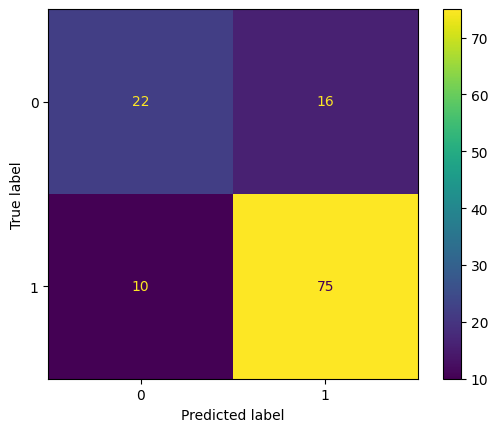

In [45]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        38
           1       0.82      0.88      0.85        85

    accuracy                           0.79       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.78      0.79      0.78       123



In [47]:
predictions = clf.predict(test)

In [48]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test.index,
    'Exited': predictions
})

In [49]:
submission_df["Exited"]

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Exited, Length: 367, dtype: int64

In [50]:
submission_df["Exited"].unique()

array([1, 0])

In [51]:
# for i in submission_df["Exited"]:
#   if i==1:
#     submission_df["Exited"][i]="Y"
#   elif i==0:
#     submission_df["Exited"][i]="N"

In [52]:
# submission_df["Exited"].unique()

In [53]:
submission_df['Exited'] = submission_df['Exited'].replace({0: 'N', 1: 'Y'})


In [54]:
submission_df["Exited"].unique()


array(['Y', 'N'], dtype=object)

In [57]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      367 non-null    int64 
 1   Exited  367 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [58]:
submission_df.to_csv('/content/drive/MyDrive/Analytics Vidhya Hackathons/2_Loan_Prediction/submission.csv', index=False)